<a href="https://colab.research.google.com/github/surajdusa/Predictive-Modelling-of-Energy-Usage-in-Response-to-Dynamic-Pricing-Signals-in-London-Households/blob/main/REF_FINALCODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from prettytable import PrettyTable
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CC_LCL-FullData.csv')

In [ ]:
df.head()

,LCLid,stdorToU,DateTime,KWH/hh (per half hour)
0,MAC000002,Std,2012-10-12 00:30:00.0000000,0
1,MAC000002,Std,2012-10-12 01:00:00.0000000,0
2,MAC000002,Std,2012-10-12 01:30:00.0000000,0
3,MAC000002,Std,2012-10-12 02:00:00.0000000,0
4,MAC000002,Std,2012-10-12 02:30:00.0000000,0


In [ ]:
print('The number of data points in the dataset:', df.shape[0])

The number of data points in the dataset: 167932474


In [ ]:
print('The number of data points in the dataset:', df.shape[1])

The number of data points in the dataset: 4


In [ ]:
df = df.iloc[:2000000]

In [ ]:
print(df.isnull().sum())

LCLid                      0
stdorToU                   0
DateTime                   0
KWH/hh (per half hour)     0
dtype: int64


In [ ]:
df["Date"] = pd.to_datetime(df["DateTime"]).dt.date
df["Time"] = pd.to_datetime(df["DateTime"]).dt.time
df.drop(columns=["DateTime"], inplace=True)

In [ ]:
print('The number of data points in the dataset:', df.shape[0])

The number of data points in the dataset: 2000000


In [ ]:
df.head()

,LCLid,stdorToU,KWH/hh (per half hour),Date,Time
0,MAC000002,Std,0,2012-10-12,00:30:00
1,MAC000002,Std,0,2012-10-12,01:00:00
2,MAC000002,Std,0,2012-10-12,01:30:00
3,MAC000002,Std,0,2012-10-12,02:00:00
4,MAC000002,Std,0,2012-10-12,02:30:00


In [ ]:
print(df.columns.tolist())

['LCLid', 'stdorToU', 'KWH/hh (per half hour) ', 'Date', 'Time']


In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
df["KWH/hh (per half hour)"] = pd.to_numeric(df["KWH/hh (per half hour)"], errors="coerce")

In [ ]:
dx = df.groupby("Date")["KWH/hh (per half hour)"].sum().reset_index()
dx.columns = ["Date", "KWH"]

In [ ]:
dx.head(20)

,Date,KWH
0,2011-12-06,2.947000
1,2011-12-07,143.174000
2,2011-12-08,365.577000
3,2011-12-09,502.532000
4,2011-12-10,637.385000
5,2011-12-11,670.710001
6,2011-12-12,614.313000
7,2011-12-13,570.259000
8,2011-12-14,627.398000
9,2011-12-15,643.423001


In [ ]:
dx['Date'] = pd.to_datetime(dx['Date'], errors='coerce')

In [ ]:
dx['year'] = dx['Date'].dt.year
dx['quarter'] = dx['Date'].dt.quarter
dx['month'] = dx['Date'].dt.month
dx['day'] = dx['Date'].dt.day

In [ ]:
dx.head()

,Date,KWH,year,quarter,month,day
0,2011-12-06,2.947,2011,4,12,6
1,2011-12-07,143.174,2011,4,12,7
2,2011-12-08,365.577,2011,4,12,8
3,2011-12-09,502.532,2011,4,12,9
4,2011-12-10,637.385,2011,4,12,10


In [ ]:
import calendar
dx['month'] = dx['month'].apply(lambda x: calendar.month_name[x])

In [ ]:
dx.head()

,Date,KWH,year,quarter,month,day
0,2011-12-06,2.947,2011,4,December,6
1,2011-12-07,143.174,2011,4,December,7
2,2011-12-08,365.577,2011,4,December,8
3,2011-12-09,502.532,2011,4,December,9
4,2011-12-10,637.385,2011,4,December,10


In [ ]:
dx.tail()

,Date,KWH,year,quarter,month,day
811,2014-02-24,620.515001,2014,1,February,24
812,2014-02-25,575.761001,2014,1,February,25
813,2014-02-26,602.744000,2014,1,February,26
814,2014-02-27,605.165001,2014,1,February,27
815,2014-02-28,41.394000,2014,1,February,28


In [ ]:
dx.KWH.describe()

count    816.000000
mean     586.107567
std      125.938950
min        2.947000
25%      482.893750
50%      564.665500
75%      668.310750
max      942.200000
Name: KWH, dtype: float64

# Feature Engineering

##### Based on data from countryeconomy.com, the average household electricity prices in the United Kingdom, including taxes, were as follows:

In [ ]:
table = PrettyTable()
table.field_names = ["Year", "Average Price (GBP per kWh)"]
data = [[2011, 0.1446], [2012, 0.1532], [2013, 0.1596], [2014, 0.1653]]

for year, price in data:
    table.add_row([year, price])
print(table)

+------+-----------------------------+
| Year | Average Price (GBP per kWh) |
+------+-----------------------------+
| 2011 |            0.1446           |
| 2012 |            0.1532           |
| 2013 |            0.1596           |
| 2014 |            0.1653           |
+------+-----------------------------+


Source: https://countryeconomy.com/energy-and-environment/electricity-price-household/uk

P.S.: These figures are national averages of UK between 2011 and 2014 and the prices indicate a consistent increase in electricity prices during this period.

In [ ]:
average_prices = {2011: 0.1446,  2012: 0.1532, 2013: 0.1596, 2014: 0.1653}

dx['Price (GBP per kWh)'] = dx['year'].map(average_prices)
dx['Total Cost (GBP)'] = dx['KWH'].round(1) * dx['Price (GBP per kWh)'].round(2)

In [ ]:
dx.sample(20)

,Date,KWH,year,quarter,month,day,Price (GBP per kWh),Total Cost (GBP)
670,2013-10-06,518.468000,2013,4,October,6,0.1596,82.960
347,2012-11-17,690.030999,2012,4,November,17,0.1532,103.500
281,2012-09-12,483.298000,2012,3,September,12,0.1532,72.495
21,2011-12-27,559.425000,2011,4,December,27,0.1446,78.316
90,2012-03-05,608.619999,2012,1,March,5,0.1532,91.290
774,2014-01-18,611.571000,2014,1,January,18,0.1653,103.972
718,2013-11-23,631.385999,2013,4,November,23,0.1596,101.024
775,2014-01-19,609.824001,2014,1,January,19,0.1653,103.666
84,2012-02-28,560.495000,2012,1,February,28,0.1532,84.075
483,2013-04-02,785.244999,2013,2,April,2,0.1596,125.632


In [ ]:
dx['Total Cost (GBP)'].describe()

count    816.000000
mean      91.331045
std       20.604329
min        0.406000
25%       74.848000
50%       86.670000
75%      106.892500
max      150.752000
Name: Total Cost (GBP), dtype: float64

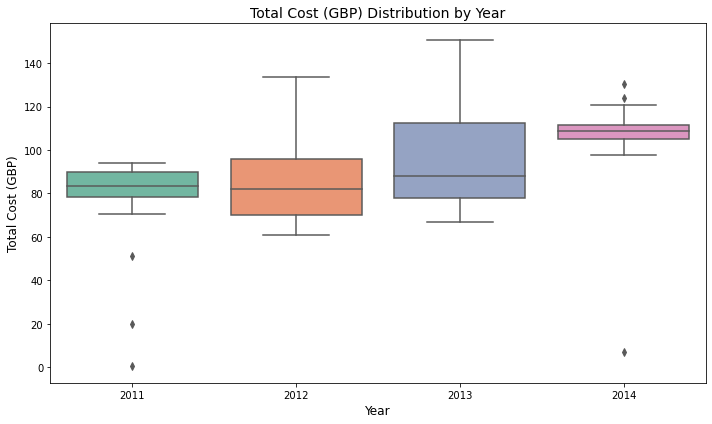

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='Total Cost (GBP)', data=dx, palette='Set2')
plt.title("Total Cost (GBP) Distribution by Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Cost (GBP)", fontsize=12)
plt.tight_layout()
plt.show()

# Data Analysis

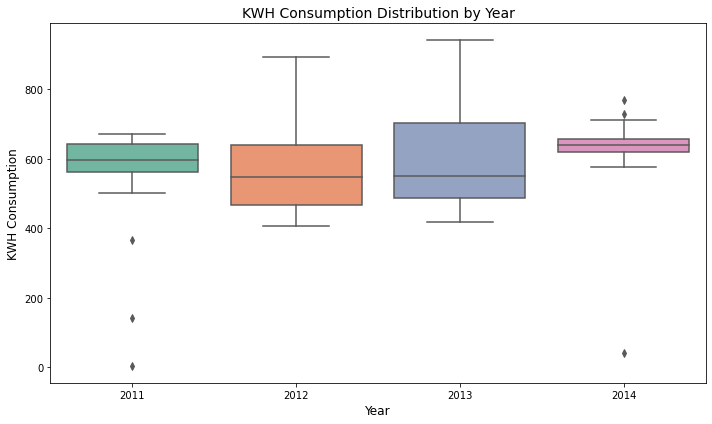

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='KWH', data=dx, palette='Set2')
plt.title("KWH Consumption Distribution by Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("KWH Consumption", fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
Q1 = dx['KWH'].quantile(0.25)
Q3 = dx['KWH'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
dx = dx[(dx['KWH'] >= lower_bound) & (dx['KWH'] <= upper_bound)]

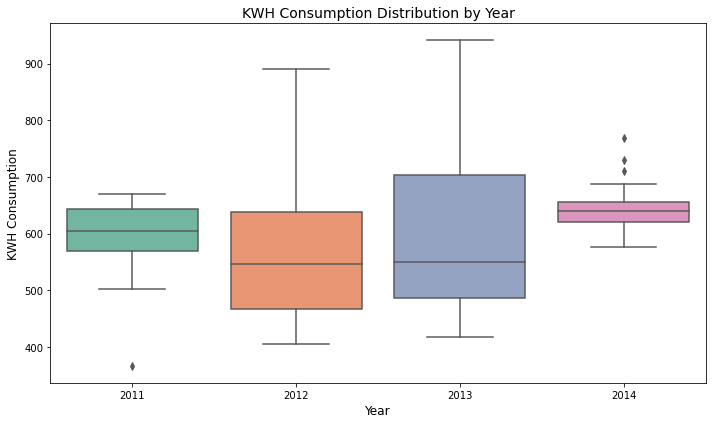

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='KWH', data=dx, palette='Set2')
plt.title("KWH Consumption Distribution by Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("KWH Consumption", fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
dx.head()

,Date,KWH,year,quarter,month,day,Price (GBP per kWh),Total Cost (GBP)
2,2011-12-08,365.577000,2011,4,December,8,0.1446,51.184
3,2011-12-09,502.532000,2011,4,December,9,0.1446,70.350
4,2011-12-10,637.385000,2011,4,December,10,0.1446,89.236
5,2011-12-11,670.710001,2011,4,December,11,0.1446,93.898
6,2011-12-12,614.313000,2011,4,December,12,0.1446,86.002


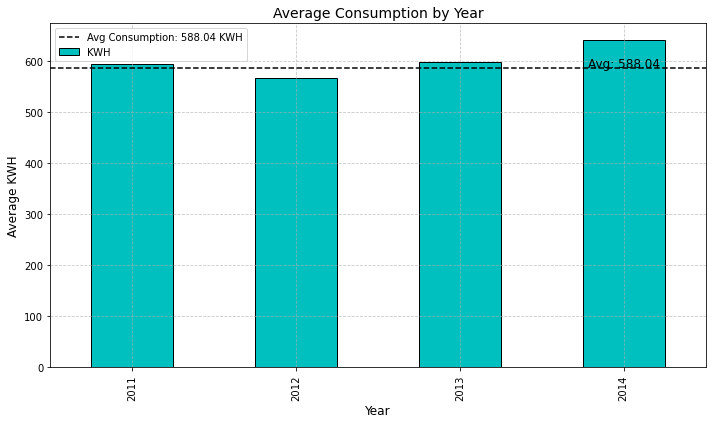

In [ ]:
yearly_avg = dx.groupby('year')['KWH'].mean()
plt.figure(figsize=(10, 6))
yearly_avg.plot(kind='bar', color='c', edgecolor='black')
overall_avg = dx['KWH'].mean()
plt.axhline(y=overall_avg, color='black', linestyle='--', label=f"Avg Consumption: {overall_avg:.2f} KWH")
plt.text(len(yearly_avg) - 1, overall_avg + 0.05, f"Avg: {overall_avg:.2f}", color='black', fontsize=12, ha='center')
plt.title("Average Consumption by Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average KWH", fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

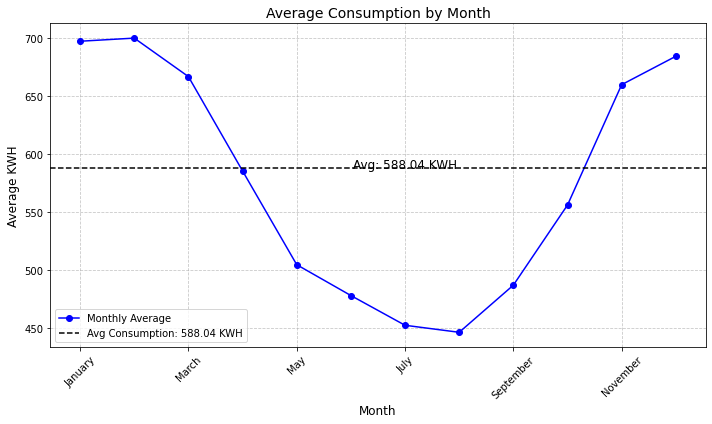

In [ ]:
month_order = list(calendar.month_name)[1:]
dx['month'] = pd.Categorical(dx['month'], categories=month_order, ordered=True)

overall_avg = dx["KWH"].mean()
monthly_avg = dx.groupby('month')['KWH'].mean()
plt.figure(figsize=(10, 6))
monthly_avg.plot(kind='line', marker='o', color='b', label='Monthly Average')
plt.axhline(y=overall_avg, color='black', linestyle='--', label=f"Avg Consumption: {overall_avg:.2f} KWH")
plt.title("Average Consumption by Month", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average KWH", fontsize=12)
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.text(6, overall_avg + 0.05, f"Avg: {overall_avg:.2f} KWH", color='black', fontsize=12, ha='center')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
print('Minimum date:', dx.Date.min())
print('Maximum date:', dx.Date.max())

Minimum date: 2011-12-08 00:00:00
Maximum date: 2014-02-27 00:00:00


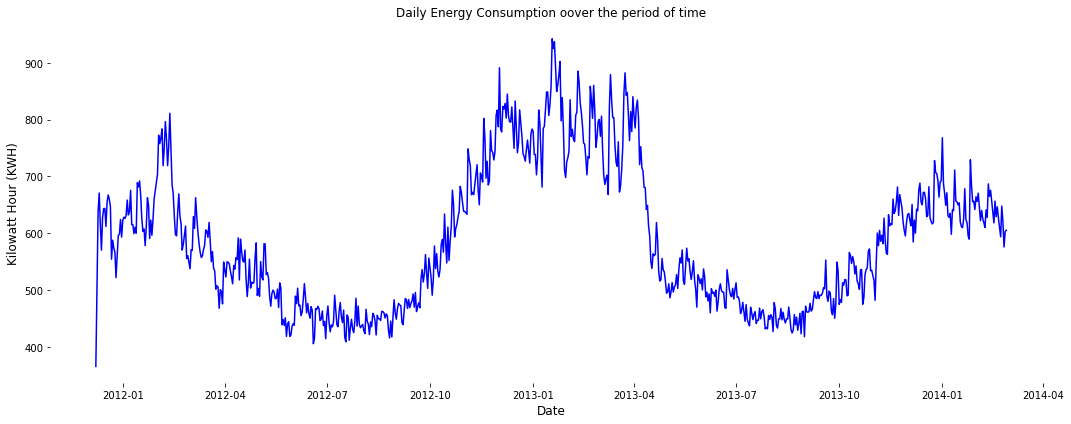

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(dx['Date'], dx['KWH'], color='blue')
plt.ylabel('Kilowatt Hour (KWH)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.title('Daily Energy Consumption oover the period of time')
plt.tight_layout()
sns.despine(bottom=True, left=True)
plt.show()

# Time-series Analysis

# ARIMA

In [ ]:
dx.head()

,Date,KWH,year,quarter,month,day,Price (GBP per kWh),Total Cost (GBP)
2,2011-12-08,365.577000,2011,4,December,8,0.1446,51.184
3,2011-12-09,502.532000,2011,4,December,9,0.1446,70.350
4,2011-12-10,637.385000,2011,4,December,10,0.1446,89.236
5,2011-12-11,670.710001,2011,4,December,11,0.1446,93.898
6,2011-12-12,614.313000,2011,4,December,12,0.1446,86.002


In [ ]:
dx['Date'] = pd.to_datetime(dx['Date'])
dx = dx.sort_values('Date')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
dx['Cost_normalized'] = scaler.fit_transform(dx[['Total Cost (GBP)']])

In [ ]:
dx.head()

,Date,KWH,year,quarter,month,day,Price (GBP per kWh),Total Cost (GBP),Cost_normalized
2,2011-12-08,365.577000,2011,4,December,8,0.1446,51.184,0.000000
3,2011-12-09,502.532000,2011,4,December,9,0.1446,70.350,0.192492
4,2011-12-10,637.385000,2011,4,December,10,0.1446,89.236,0.382171
5,2011-12-11,670.710001,2011,4,December,11,0.1446,93.898,0.428993
6,2011-12-12,614.313000,2011,4,December,12,0.1446,86.002,0.349691


In [ ]:
import itertools
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from pmdarima import auto_arima
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
warnings.filterwarnings("ignore")

In [ ]:
split_idx = int(0.8 * len(dx))
train, test = dx['Cost_normalized'][:split_idx], dx['Cost_normalized'][split_idx:]

In [ ]:
results = []

for p in range(2, 7):
    for d in range(1, 3):
        for q in range(2, 7):
            try:
                model = ARIMA(train, order=(p, d, q))
                fitted_model = model.fit()
                aic = fitted_model.aic
                results.append(((p, d, q), aic))
                print(f"ARIMA({p},{d},{q}) - AIC: {aic}")
            except Exception as e:
                print(f"ARIMA({p},{d},{q}) failed: {e}")

best_order, best_aic = min(results, key=lambda x: x[1])
print(f"Optimal ARIMA Order: {best_order} with AIC: {best_aic}")

ARIMA(2,1,2) - AIC: -2032.3793236401657
ARIMA(2,1,3) - AIC: -2030.060388534693
ARIMA(2,1,4) - AIC: -2042.699654586369
ARIMA(2,1,5) - AIC: -2075.798596155887
ARIMA(2,1,6) - AIC: -2069.2354594370317
ARIMA(2,2,2) - AIC: -1995.7920554293148
ARIMA(2,2,3) - AIC: -1977.1267688435923
ARIMA(2,2,4) - AIC: -2015.8413995051642
ARIMA(2,2,5) - AIC: -2013.4401893022987
ARIMA(2,2,6) - AIC: -2010.2983011269678
ARIMA(3,1,2) - AIC: -2030.0909872860834
ARIMA(3,1,3) - AIC: -2032.380035788544
ARIMA(3,1,4) - AIC: -2073.2505100593676
ARIMA(3,1,5) - AIC: -2063.4123922158456
ARIMA(3,1,6) - AIC: -2072.1695367244693
ARIMA(3,2,2) - AIC: -2007.8041809388144
ARIMA(3,2,3) - AIC: -2051.25290085117
ARIMA(3,2,4) - AIC: -2038.0433310421704
ARIMA(3,2,5) - AIC: -2037.3664609684806
ARIMA(3,2,6) - AIC: -2047.1478092404868
ARIMA(4,1,2) - AIC: -2028.0874434581613
ARIMA(4,1,3) - AIC: -2027.0227008851878
ARIMA(4,1,4) - AIC: -2035.5187036129046
ARIMA(4,1,5) - AIC: -2029.4389434186883
ARIMA(4,1,6) - AIC: -2075.845466628364
ARIMA(4

In [ ]:
model = ARIMA(train, order=best_order)
model_fit = model.fit()
forecast_arima = model_fit.forecast(steps=len(test))
hw_model = ExponentialSmoothing(train, trend="add", seasonal=None).fit()
forecast_ets = hw_model.forecast(steps=len(test))
forecast_hybrid = (forecast_arima + forecast_ets) / 2
forecast_actual = scaler.inverse_transform(np.array(forecast_hybrid).reshape(-1, 1))
test_actual = scaler.inverse_transform(np.array(test).reshape(-1, 1))
mse = mean_squared_error(test_actual, forecast_actual)
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 427.4294


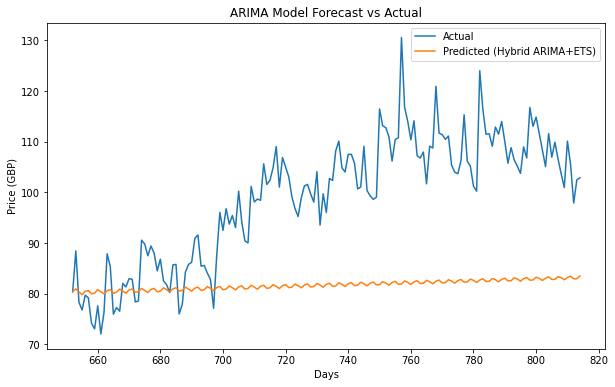

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(test.index, test_actual, label="Actual")
plt.plot(test.index, forecast_actual, label="Predicted (Hybrid ARIMA+ETS)")
plt.xlabel("Days")
plt.ylabel("Price (GBP)")
plt.title("ARIMA Model Forecast vs Actual")
plt.legend()
plt.show()

# VARIMA

In [ ]:
from statsmodels.tsa.api import VAR

In [ ]:
feat = dx[['KWH', 'Total Cost (GBP)']]

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(feat), columns=feat.columns, index=feat.index)

In [ ]:
split_idx = int(0.8 * len(df_scaled))
train, test = df_scaled.iloc[:split_idx], df_scaled.iloc[split_idx:]

In [ ]:
var_model = VAR(train)
var_fit = var_model.fit(maxlags=10, ic='aic')
forecast_steps = len(test)
forecast = var_fit.forecast(train.values[-var_fit.k_ar:], steps=forecast_steps)
forecast_df = pd.DataFrame(forecast, columns=feat.columns, index=test.index)
forecast_actual = scaler.inverse_transform(forecast_df)
test_actual = scaler.inverse_transform(test)
mse = mean_squared_error(test_actual[:, 1], forecast_actual[:, 1])
print(f"VARIMA Mean Squared Error: {mse:.4f}")

VARIMA Mean Squared Error: 324.4844


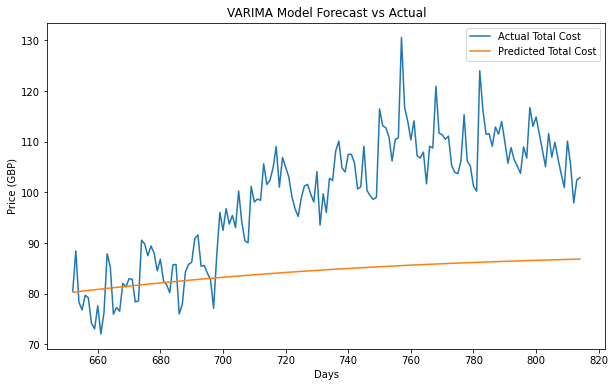

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(test.index, test_actual[:, 1], label="Actual Total Cost")
plt.plot(test.index, forecast_actual[:, 1], label="Predicted Total Cost")
plt.xlabel("Days")
plt.ylabel("Price (GBP)")
plt.title("VARIMA Model Forecast vs Actual")
plt.legend()
plt.show()

# RNN

In [ ]:
dx.head()

,Date,KWH,year,quarter,month,day,Price (GBP per kWh),Total Cost (GBP),Cost_normalized
2,2011-12-08,365.577000,2011,4,December,8,0.1446,51.184,0.000000
3,2011-12-09,502.532000,2011,4,December,9,0.1446,70.350,0.192492
4,2011-12-10,637.385000,2011,4,December,10,0.1446,89.236,0.382171
5,2011-12-11,670.710001,2011,4,December,11,0.1446,93.898,0.428993
6,2011-12-12,614.313000,2011,4,December,12,0.1446,86.002,0.349691


In [ ]:
def create_sequences(data, input_steps):
    x, y = [], []
    for i in range(len(data) - input_steps):
        x.append(data[i:i + input_steps])
        y.append(data[i + input_steps])
    return np.array(x), np.array(y)

In [ ]:
input_steps = 60
x, y = create_sequences(dx['Cost_normalized'].values, input_steps)
x = x.reshape((x.shape[0], x.shape[1], 1))

In [ ]:
split_idx = int(0.8 * len(x))
x_train, x_test = x[:split_idx], x[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

## LSTM

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(input_steps, 1)),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)])

In [ ]:
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 60, 64)            16896     
                                                                 
 dropout_12 (Dropout)        (None, 60, 64)            0         
                                                                 
 lstm_11 (LSTM)              (None, 64)                33024     
                                                                 
 dropout_13 (Dropout)        (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 52,033
Trainable params: 52,033
Non-trai

In [ ]:
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/50
19/19 [==============================] - 5s 84ms/step - loss: 0.0460 - val_loss: 0.0196
Epoch 2/50
19/19 [==============================] - 1s 41ms/step - loss: 0.0119 - val_loss: 0.0054
Epoch 3/50
19/19 [==============================] - 1s 42ms/step - loss: 0.0078 - val_loss: 0.0039
Epoch 4/50
19/19 [==============================] - 1s 43ms/step - loss: 0.0072 - val_loss: 0.0036
Epoch 5/50
19/19 [==============================] - 1s 42ms/step - loss: 0.0074 - val_loss: 0.0048
Epoch 6/50
19/19 [==============================] - 1s 42ms/step - loss: 0.0062 - val_loss: 0.0045
Epoch 7/50
19/19 [==============================] - 1s 45ms/step - loss: 0.0063 - val_loss: 0.0033
Epoch 8/50
19/19 [==============================] - 1s 56ms/step - loss: 0.0059 - val_loss: 0.0033
Epoch 9/50
19/19 [==============================] - 1s 45ms/step - loss: 0.0073 - val_loss: 0.0032
Epoch 10/50
19/19 [==============================] - 1s 51ms/step - loss: 0.0060 - val_loss: 0.0033
Epoch 11/

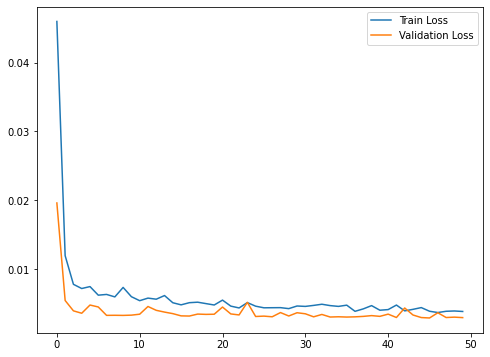

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(x_test)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_rescaled = scaler.inverse_transform(y_pred)
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 28.9839


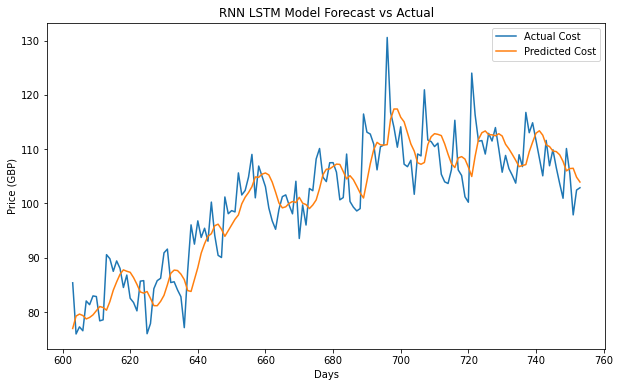

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(603, 754), y_test_rescaled, label='Actual Cost')
plt.plot(range(603, 754), y_pred_rescaled, label='Predicted Cost')
plt.xlabel("Days")
plt.ylabel("Price (GBP)")
plt.title("RNN LSTM Model Forecast vs Actual")
plt.legend()
plt.show()

## GRU

In [ ]:
from tensorflow.keras.layers import GRU

In [ ]:
model = Sequential([
    GRU(64, return_sequences=True, input_shape=(input_steps, 1)),
    Dropout(0.2),
    GRU(64, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)])

In [ ]:
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 60, 64)            12864     
                                                                 
 dropout_10 (Dropout)        (None, 60, 64)            0         
                                                                 
 gru_1 (GRU)                 (None, 64)                24960     
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 39,937
Trainable params: 39,937
Non-trai

In [ ]:
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/50
19/19 [==============================] - 5s 85ms/step - loss: 0.0505 - val_loss: 0.0084
Epoch 2/50
19/19 [==============================] - 1s 41ms/step - loss: 0.0114 - val_loss: 0.0030
Epoch 3/50
19/19 [==============================] - 1s 42ms/step - loss: 0.0068 - val_loss: 0.0036
Epoch 4/50
19/19 [==============================] - 1s 46ms/step - loss: 0.0052 - val_loss: 0.0036
Epoch 5/50
19/19 [==============================] - 1s 47ms/step - loss: 0.0052 - val_loss: 0.0034
Epoch 6/50
19/19 [==============================] - 1s 45ms/step - loss: 0.0043 - val_loss: 0.0031
Epoch 7/50
19/19 [==============================] - 1s 39ms/step - loss: 0.0047 - val_loss: 0.0032
Epoch 8/50
19/19 [==============================] - 1s 39ms/step - loss: 0.0047 - val_loss: 0.0038
Epoch 9/50
19/19 [==============================] - 1s 43ms/step - loss: 0.0048 - val_loss: 0.0041
Epoch 10/50
19/19 [==============================] - 1s 37ms/step - loss: 0.0043 - val_loss: 0.0028
Epoch 11/

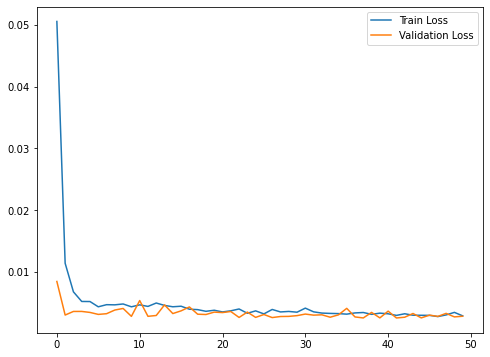

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(x_test)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_rescaled = scaler.inverse_transform(y_pred)
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 27.9185


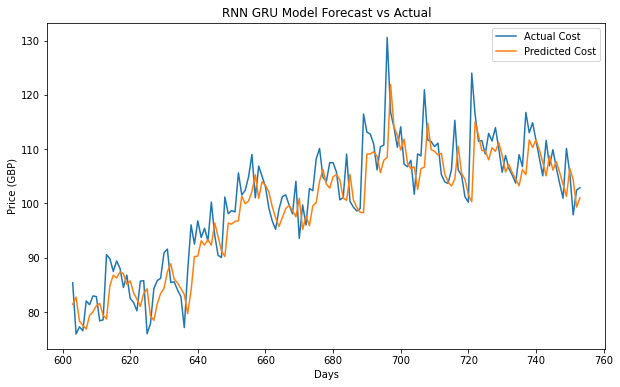

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(603, 754), y_test_rescaled, label='Actual Cost')
plt.plot(range(603, 754), y_pred_rescaled, label='Predicted Cost')
plt.xlabel("Days")
plt.ylabel("Price (GBP)")
plt.title("RNN GRU Model Forecast vs Actual")
plt.legend()
plt.show()